# Klasifikasi Email Spam dan Non Spam Menggunakan Support Vector Machine (SVM)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import matplotlib.pyplot as plt

## Load Dataset

In [ ]:
file_path = '/content/sample_data/completeSpamAssassin.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046 entries, 0 to 6045
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6046 non-null   int64 
 1   Body        6045 non-null   object
 2   Label       6046 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 141.8+ KB
None


In [ ]:
df.head()

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


## Preprocessing

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df = df.dropna()
df = df.drop_duplicates()

In [ ]:
print(df['Label'].value_counts())

Label
0    3915
1    1378
Name: count, dtype: int64


In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [ ]:
def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'\W', ' ', text)
  text = re.sub(r'\d+', '', text)
  words = text.split()
  words = [stemmer.stem(word) for word in words if word not in stop_words]
  return ' '.join(words)

df['Body'] = df['Body'].apply(preprocess_text)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5293 entries, 0 to 6043
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    5293 non-null   object
 1   Label   5293 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.1+ KB
None


In [ ]:
df.head()

,Body,Label
0,save life insur spend life quot save ensur fam...,1
1,fight risk cancer http www adclick ws p cfm pk...,1
2,fight risk cancer http www adclick ws p cfm pk...,1
3,adult club offer free membership instant acces...,1
4,thought might like slim guarante lose lb day h...,1


## Feature & Label

In [ ]:
X = df['Body']
y = df['Label']

## Feature Extraction

In [ ]:
vectorizer = TfidfVectorizer(max_features=3000)
X_tfidf = vectorizer.fit_transform(X)

## Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Model Training

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

## Evaluation

In [ ]:
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)[:, 1]

Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       765
           1       0.98      0.98      0.98       294

    accuracy                           0.99      1059
   macro avg       0.99      0.98      0.98      1059
weighted avg       0.99      0.99      0.99      1059


Accuracy Score: 0.987724268177526

ROC-AUC Score: 0.9993730825663599


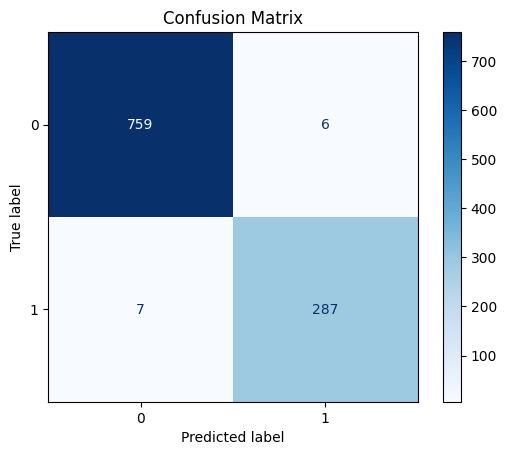

In [ ]:
print('Evaluation')
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred))
print('\nAccuracy Score:', accuracy_score(y_test, y_test_pred))
print('\nROC-AUC Score:', roc_auc_score(y_test, y_test_proba))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Cara Kerja SVM Terhadap Data

In [ ]:
feature_names = vectorizer.get_feature_names_out()
tfidf_sample = pd.DataFrame(X_tfidf[:10].toarray(), columns=feature_names)
print(tfidf_sample.head())

    __  _______________________________________________  \
0  0.0                                              0.0   
1  0.0                                              0.0   
2  0.0                                              0.0   
3  0.0                                              0.0   
4  0.0                                              0.0   

   _________________________________________________________________  _thank  \
0                                                0.0                     0.0   
1                                                0.0                     0.0   
2                                                0.0                     0.0   
3                                                0.0                     0.0   
4                                                0.0                     0.0   

    aa   ab  abandon  abil  abl   absolut  ...   çš   ìš   ìž   ÿã   œâ   œã  \
0  0.0  0.0      0.0   0.0  0.0  0.000000  ...  0.0  0.0  0.0  0.0  0.0  0.0   
1  0

In [ ]:
model = SVC(kernel='linear')
model.fit(X_tfidf, y)

coef = model.coef_.toarray()
weights = pd.DataFrame({'Feature': feature_names, 'Weight': coef[0]})
print(weights.head(20))
weights = weights.sort_values(by='Weight', ascending=False)
print(weights.head(20))

                                              Feature    Weight
0                                                  __ -0.156312
1     _______________________________________________ -0.321787
2   ______________________________________________... -0.551399
3                                              _thank -0.179229
4                                                  aa  0.043747
5                                                  ab  0.422209
6                                             abandon -0.024990
7                                                abil -0.147426
8                                                 abl  0.316987
9                                             absolut  0.562996
10                                               abus  0.114559
11                                                 ac -0.127310
12                                            acceler  0.013551
13                                             accept  0.043720
14                                      

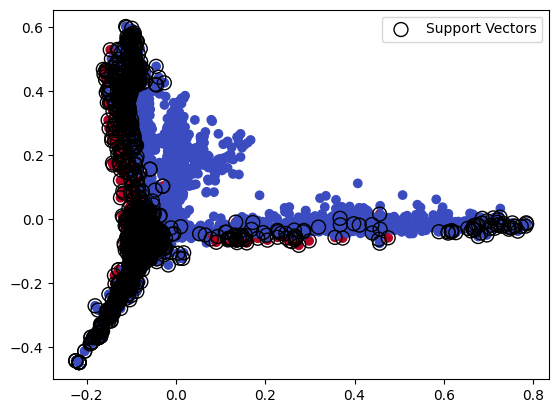

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_tfidf.toarray())

model = SVC(kernel='linear')
model.fit(X_2d, y)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm')

plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.legend()
plt.show()